Se importan las librerias 

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from numpy import fft
import math as mt

#def THD (RMS):
#    THDi= (np.sum(RMS[2:]))/RMS[1]
#
#    return THDi


def THD(RMS, RMST):

    THDi= (np.sqrt(RMST**2 - RMS[1]**2))/(RMS[1])

    return THDi

def filtro_pasabajas_ideal(signal, time, fc):
    # Calcula la transformada de Fourier de la señal
    fourier = np.fft.fft(signal)
    
    # Crea el vector de frecuencias
    freq = np.fft.fftfreq(len(signal), d=time[1] - time[0])
    
    # Aplica el filtro pasabajas ideal
    fourier_filt = fourier.copy()
    fourier_filt[np.abs(freq) > fc] = 0
    
    # Calcula la transformada inversa de Fourier
    signal_filt = np.fft.ifft(fourier_filt)
    
    return np.real(signal_filt)

def Armonicos (señal, tiempo, n):
    #T=len(tiempo)
    #T=tiempo[-1]
    T=len(tiempo)
    an=0
    bn=0
    a0=0
    for i in range (0,T,1):
        a0+=(1/T) * señal[i]
        an+=(2/T) * señal[i]*np.cos(n*2*np.pi*60*tiempo[i])
        bn+=(2/T) * señal[i]*np.sin(n*2*np.pi*60*tiempo[i])
    An=np.sqrt((an**2)+(bn**2))
    theta_n=np.arctan(bn/an)
    gamma_n=np.arctan(an/bn)
    return An, theta_n, gamma_n, a0, an, bn

##Para obtener los datos de los puntos organizados
def get_oscilloscope(ruta):
    Dataframe=pd.read_csv(ruta)
    Dataframe=Dataframe.iloc[:, 3:5] 
    Dataframe.columns=["Tiempo", "Magnitud"]
    return Dataframe 
 
def buscaarmonicos(magnitud, tiempo):
    n=50
    armonicos=np.zeros(n)
    thetas= np.zeros(n)
    gammas=np.zeros(n)
    an=np.zeros(n)
    bn=np.zeros(n)
    RMS=np.zeros(n)
    ft=0
    maxt=0
    for j in range(1,n,1):
        armonicos[j] ,thetas[j], gammas[j], a0, an[j], bn[j]  =Armonicos(magnitud,tiempo,j)
        #ft+=armonicos[j]*np.cos(j*2*np.pi*60*tiempo-thetas[j])

        #SE HIZO CON LA OTRA FORMULA, REVISAR AN
        #RMS[j]=np.sqrt(np.mean(np.square(an[j]*np.cos(j*2*np.pi*60*tiempo)+bn[j]*np.sin(j*2*np.pi*60*tiempo))))
        
        # Rms integraaaaaal
        RMS[j]=rmspalosmachos(an[j]*np.cos(j*2*np.pi*60*tiempo)+bn[j]*np.sin(j*2*np.pi*60*tiempo), tiempo)

        ft+=an[j]*np.cos(j*2*np.pi*60*tiempo)+bn[j]*np.sin(j*2*np.pi*60*tiempo)
        maxt+=max(an[j]*np.cos(j*2*np.pi*60*tiempo)+bn[j]*np.sin(j*2*np.pi*60*tiempo))

        #ft+=((an[j]**2 +bn[j]**2)**(1/2))*np.sin((j*2*np.pi*60*tiempo )- mt.atan(an[j]/(-bn[j])))
        #ft+=(an[j]+bn[j])*np.sin(j*2*np.pi*60*tiempo - (np.pi/4))
 
    RMS[0]=a0
    RMS_ARMONICOS=RMS    
    ft=ft+a0
    return ft, armonicos , RMS_ARMONICOS 

def rmspalosmachos(fun,tiempo):
    #T=tiempo.iloc[-1]
    T=len(tiempo)
    #deltat=tiempo[1]-tiempo[0]   
    frms=0
    for i in range(len(tiempo)):
        frms+=(1/T)*((fun[i]**2))
    frms=np.sqrt((frms))
    return frms
    

Carga inductiva

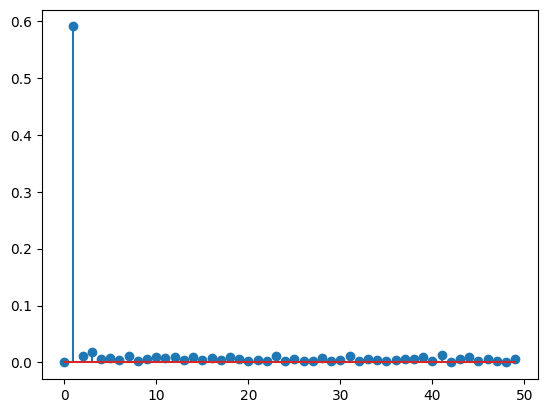

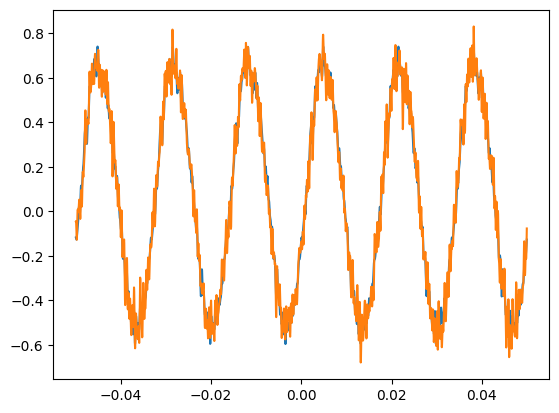

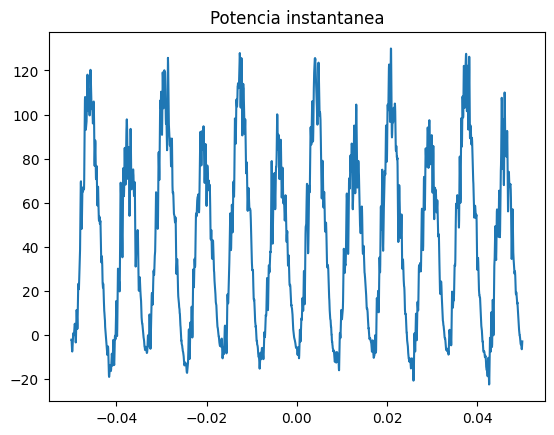

Distorsion armonica total 0.1827563120838409
-------------------------------
RMS integral 0.4244025875985714
RMS segun el cachón 0.42440258759857147
Rms con np.sum only for pussys 0.424385472239703


In [192]:
CH1=get_oscilloscope("abanico/CH1.CSV")#Tension en el canal 1/2
CH2=get_oscilloscope("abanico/CH2.CSV")
R=10.4
CURRENT=(CH1.Magnitud-CH2.Magnitud)/10
#CURRENT=(CH1.Magnitud)
CURRENT=filtro_pasabajas_ideal(CURRENT, CH1.Tiempo.to_numpy(),3500)
ACTIVE_POWER=CURRENT*CH1.Magnitud



##Componentes armonicos
ft, armonicos, RMS_Armonicos =buscaarmonicos(CURRENT, CH1.Tiempo)

plt.stem(armonicos)
plt.show()
plt.plot(CH1.Tiempo,ft)
plt.plot(CH1.Tiempo,CURRENT)
plt.show()

plt.plot(CH1.Tiempo, CH1.Magnitud*CURRENT)
plt.title("Potencia instantanea")
plt.show()

THDi=THD(RMS_Armonicos,(np.sqrt(np.sum(RMS_Armonicos**2))))
print("Distorsion armonica total "+ str(THDi))

print("-------------------------------")
rmsinte=rmspalosmachos(ft, CH1.Tiempo)
print("RMS integral "+ str(rmsinte))
#print("RMS segun el cachón "+str(np.sum(RMS_Armonicos)))
print("RMS segun el cachón "+str(np.sqrt(np.mean(np.square(ft)))))
print("Rms con np.sum only for pussys "+str(np.sqrt(np.sum(RMS_Armonicos**2))))

#np.sqrt(np.mean(np.square(

## Carga no lineal

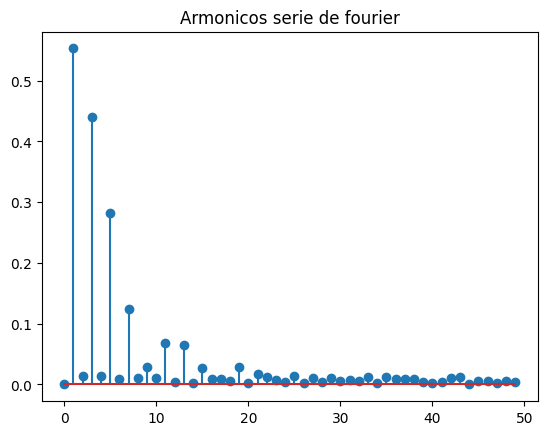

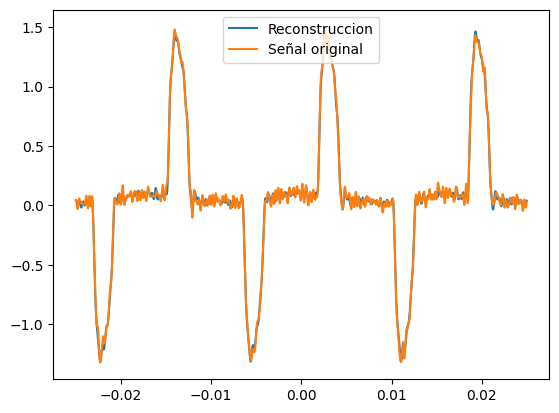

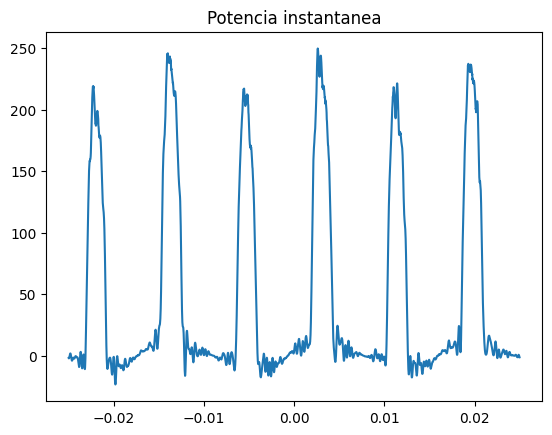

Distorsion armonica total1.011354433903074


In [193]:
CH1=get_oscilloscope("PC\ALL0001\F0001CH1.CSV")#Tension en el canal 1/2
CH2=get_oscilloscope("PC\ALL0001\F0001CH2.CSV")

R=10.4
CURRENT=(CH1.Magnitud-CH2.Magnitud)/R

CURRENT=filtro_pasabajas_ideal(CURRENT, CH1.Tiempo.to_numpy(),3500)
ACTIVE_POWER=CURRENT*CH1.Magnitud

####

VRMS=np.sqrt(np.mean(np.square(CH1.Magnitud)))






ft, armonicos,RMS_Armonicos =buscaarmonicos(CURRENT, CH1.Tiempo)

plt.stem(armonicos)
plt.title("Armonicos serie de fourier")
plt.show()
plt.plot(CH1.Tiempo,ft, label="Reconstruccion")
plt.plot(CH1.Tiempo,CURRENT, label="Señal original")
plt.legend()
plt.show()


plt.plot(CH1.Tiempo, CH1.Magnitud*CURRENT)
plt.title("Potencia instantanea")
plt.show()


THDi=THD(RMS_Armonicos,(np.sqrt(np.sum(RMS_Armonicos**2))))
print("Distorsion armonica total "+ str(THDi))


#

CARGA RESISTIVA

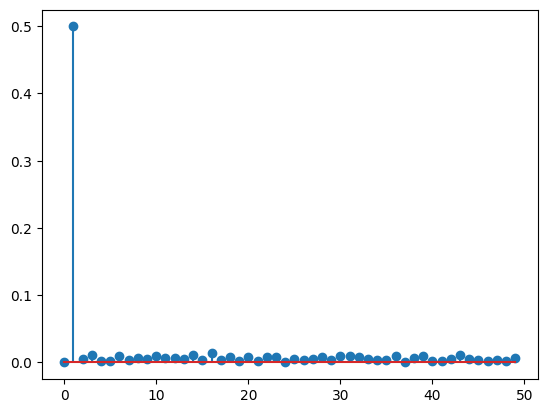

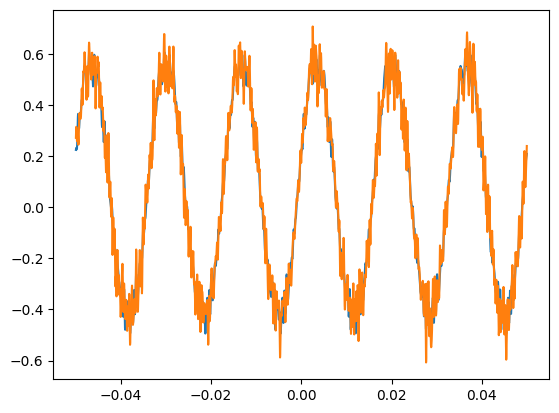

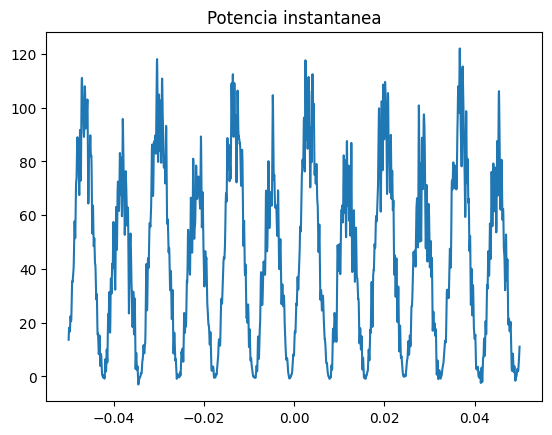

Distorsion armonica total0.20820137383288936


In [194]:
CH1=get_oscilloscope("cautin\F0000CH1.CSV")#Tension en el canal 1/2
CH2=get_oscilloscope("cautin\F0000CH2.CSV")

R=10.4
CURRENT=(CH1.Magnitud-CH2.Magnitud)/R

ACTIVE_POWER=CURRENT*CH1.Magnitud
CURRENT=filtro_pasabajas_ideal(CURRENT, CH1.Tiempo.to_numpy(),3500)
##Componentes armonicos


ft, armonicos,RMS_Armonicos =buscaarmonicos(CURRENT, CH1.Tiempo)
plt.stem(armonicos)
plt.show()
plt.plot(CH1.Tiempo,ft)
plt.plot(CH1.Tiempo,CURRENT)
plt.show()

plt.plot(CH1.Tiempo, CH1.Magnitud*CURRENT)
plt.title("Potencia instantanea")
plt.show()


THDi=THD(RMS_Armonicos,(np.sqrt(np.sum(RMS_Armonicos**2))))
print("Distorsion armonica total "+ str(THDi))